## Exercici 1
### Descarrega el dataset adjunt de dades oficials de la UEFA i selecciona un atribut del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%. 

### Descripció de les variables
RK: Posició global que ocupa el club.

Squad: Nom de l'equip.

Country: País on comnpeteix cada equip.

LgRk: Posició de l'equip en el seu país.

MP: Partits jugats.

W: Partits guanyats.

D: Partits empatats.

L: Partits perduts.
GF: Total de gols a favor.

GA: Total de gols en contra.

GD: Diferencia total entre GF i GA.

Pts: Total de punts.

Pts/G: Promig de punts aconseguits per cada partit jugat.

xG: Gols totals esperats.

xGA: Gols totals en contra esperats.

xGD: Diferència de gols totals esperats.

xGD/90: Promig de diferencia de gols esperats per partit.

Last 5: Resultats dels últims 5 partits.

Attendance: assistència mitjana a l'estadi.

Top Team Scorer: Màxim golejador de l'equip i número de gols.

Goalkeeper: Nom del porter (principal entenc).

In [12]:
import pandas as pd
df=pd.read_csv("Lligues europees UEFA.csv", sep=";")

In [135]:
df

,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,...,Pts,Pts/G,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper
0,1,Manchester City,ENG,1,37,28,6,3,96,24,...,90,2.43,86.1,26.8,59.3,1.60,W W W W D,52739,Kevin De Bruyne - 15,Ederson
1,2,Liverpool,ENG,2,36,26,8,2,89,24,...,86,2.39,84.6,33.1,51.4,1.43,W W W D W,53367,Mohamed Salah - 22,Alisson
2,3,Real Madrid,ESP,1,37,26,7,4,80,31,...,85,2.30,73.0,45.8,27.2,0.73,W W L W D,40624,Karim Benzema - 27,Thibaut Courtois
3,4,Bayern Munich,GER,1,34,24,5,5,97,37,...,77,2.26,88.1,37.1,51.0,1.50,W W L D D,33176,Robert Lewandowski - 35,Manuel Neuer
4,5,Paris S-G,FRA,1,37,25,8,4,85,36,...,83,2.24,71.6,38.1,33.4,0.90,W D D D W,41188,Kylian Mbapp� - 25,Keylor Navas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,94,Bordeaux,FRA,20,37,5,13,19,48,89,...,28,0.76,41.3,68.5,-27.2,-0.73,D L L L D,22083,Hwang Ui-jo - 11,Beno�t Costil
94,95,Venezia,ITA,20,37,6,8,23,34,69,...,26,0.70,35.4,70.5,-35.1,-0.95,L L L W D,6705,Thomas Henry - 9,Sergio Romero
95,96,Watford,ENG,19,37,6,5,26,33,75,...,23,0.62,37.8,64.1,-26.3,-0.71,L L L D L,20614,Emmanuel Dennis - 10,Ben Foster
96,97,Norwich City,ENG,20,37,5,7,25,23,79,...,22,0.59,33.0,73.3,-40.4,-1.09,L L L L D,26826,Teemu Pukki - 11,Tim Krul


In [18]:
df.isnull().sum() #No hi han valors nulls al dataset

Rk                 0
Squad              0
Country            0
LgRk               0
MP                 0
W                  0
D                  0
L                  0
GF                 0
GA                 0
GD                 0
Pts                0
Pts/G              0
xG                 0
xGA                0
xGD                0
xGD/90             0
Last 5             0
Attendance         0
Top Team Scorer    0
Goalkeeper         0
dtype: int64

In [20]:
df.Country.unique() #Lligues de futbol professional que apareixen al dataset.

array(['ENG', 'ESP', 'GER', 'FRA', 'ITA'], dtype=object)

In [ ]:
#Lliga anglesa, lliga espanyola, lliga alemana, lliga francesa, lliga italiana . Són les cinc grans lligues.

És important donar-se compte de que no tots els equips han jugat el mateix nombre de partits. Per exemple els equips de la Bundesliga (lliga alemana) han jugat 34 partits , mentres els equips de la lliga Santander (lliga espanyola) han jugat 37 partits. Això es degut a que cada lliga té un nombre diferent de competidors, 18 i 20 respectivament.
Per aquest motiu no podem comparar els punts de cada equip entre lligues diferents ja que alguns jugarien amb ventatja i no sortirien dades fiables.

Com a curiositat, m'he donat compte que el dataset està ordenat segons la mitjana de punts per partits jugats, no segons els punts totals.

In [32]:
df[df["Country"]=="GER"].Squad.count() #Equips lliga alemana.

18

In [30]:
df[df["Country"]=="ESP"].Squad.count() #Equips lliga espanyola.

20

Per fer el primer exercici, agafé la columna "GF" que especifica els gols a favor de cada equip. Només agafaré els equips de la lliga italiana. Vull saber si els gols a favor segueixen una distribució normal o no. Utilitzaré l'algorisme de Shapiro-Wilk Test. 

Per començar especificaré la hipotesis nul·la i la hipotesis alternativa.

H0: Les derrotes segueixen una distribució Normal

H1: Les derrotes NO segueixen una distribució Normal

Assumiré que la hipótesis nula és veritat. La mostra és de 20 equips amb n-1 graus de llibertat, per tant 19.



In [126]:
SerieA=df[df["Country"]=="ITA"] # Agafa tots els equips italians del dataset
SerieA[["Squad","GF"]] #Derrotes per cada equip italià

,Squad,GF
5,Milan,66
6,Inter,81
7,Napoli,71
11,Juventus,55
21,Lazio,72
28,Fiorentina,56
29,Roma,56
31,Atalanta,65
40,Hellas Verona,62
42,Torino,46


In [120]:
mostra=SerieA["GF"].tolist()
#Agafa la segona columna ("L") del dataframe SerieA i el converteix en una llista.
mostra

[66,
 81,
 71,
 55,
 72,
 56,
 56,
 65,
 62,
 46,
 64,
 57,
 43,
 49,
 41,
 42,
 33,
 34,
 27,
 34]

In [121]:
from scipy.stats import shapiro #Llibreria de python importa normaltest per fer l'arlgorisme de Shapiro.
stat, p = shapiro(mostra) 
#L'algorisme normaltest assigna automàticament l'estadistica del test i el p-value.

In [122]:
# El valor de p-value és el següent. El p-value representa la probabilitat d'obtenir les dades observades.
p

0.7867836356163025

In [123]:
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05: # L'alpha o nivell de significància és 0,05. Estem al 95% segurs...
 print('Probablement segueix una distribució Normal') #Si el p-value és major que alpha, no rebutjem la hipòtesi nul·la
else:
 print('Probablement NO segueix una distribució Normal') # Si és més petit, rebutjem la hipòtesi nul·la.

stat=0.972, p=0.787
Probablement segueix una distribució Normal


Segons els resultats obtinguts, estic al 95% segur de que les derrotes dels equips de la lliga italiana segueixen una distribució Normal. Per tant, no es rebutja la hipòtesis Nul·la. 

Text(0, 0.5, 'Densitat')

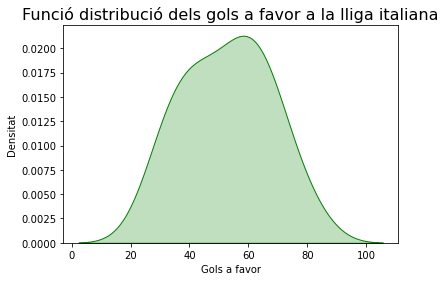

In [134]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = sns.kdeplot(mostra, fill=True, color="g") #Funció de distribució de probabilitat.
plt.title("Funció distribució dels gols a favor a la lliga italiana", size=16)
plt.xlabel("Gols a favor")
plt.ylabel("Densitat")


Es pot veure com efectivament el comportament de la distribució de les dades és gaussià.

## Exercici 2
### Amb el mateix dataset selecciona dos altres atributs del conjunt de dades. Calcula els p-valors i digues si rebutgen la hipòtesi nul·la agafant un alfa de 5%.

Sempre s'ha dit que un equip ha de tenir un bon dabanter que sapiga marcar gols per guanyar el màxim nombre de partits. De fet, un dels problemes del Barça a la temporada 2021-22 va ser la falta de gol atribuida a una baixa qualitat dels dabanters (12 gols el màxim golejador Memphis Depay). Per això mateix, al mercat d'estiu, es va fitxar al Robert Lewandowski, el màxim golejador en lligues europees (35 gols).

Vull demostrar aquesta teoria i donar la raó a aquells equips que, com el Barça, busquen un golejador, per reforçar les seves plantilles i tenir més possibilitats de guanyar els partits de lliga. 
Per fer el test d'hipòtesi, utilitzaré les variables "Punts per partit" i "Gols anotats per el màxim golejador".

Utilitzo els punts per partit en comptes de punt totals, perquè hi han alguns equips que han jugat menys partits i els seus dabanters parteixen amb desbentatja ja que no disposen de tants partits per fer gols.

Primer de tot he de dividir la columna "Top Team Scorer" en dos. 

In [ ]:
df[['Top_Team_Scorer','Goals_Team_Scorer']] = df['Top Team Scorer'].str.split(' - ', n=1, expand=True)
df = df.drop(columns=['Top Team Scorer'])

In [196]:
df

,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,...,Pts/G,xG,xGA,xGD,xGD/90,Last 5,Attendance,Goalkeeper,Top_Team_Scorer,Goals_Team_Scorer
0,1,Manchester City,ENG,1,37,28,6,3,96,24,...,2.43,86.1,26.8,59.3,1.60,W W W W D,52739,Ederson,Kevin De Bruyne,15
1,2,Liverpool,ENG,2,36,26,8,2,89,24,...,2.39,84.6,33.1,51.4,1.43,W W W D W,53367,Alisson,Mohamed Salah,22
2,3,Real Madrid,ESP,1,37,26,7,4,80,31,...,2.30,73.0,45.8,27.2,0.73,W W L W D,40624,Thibaut Courtois,Karim Benzema,27
3,4,Bayern Munich,GER,1,34,24,5,5,97,37,...,2.26,88.1,37.1,51.0,1.50,W W L D D,33176,Manuel Neuer,Robert Lewandowski,35
4,5,Paris S-G,FRA,1,37,25,8,4,85,36,...,2.24,71.6,38.1,33.4,0.90,W D D D W,41188,Keylor Navas,Kylian Mbapp�,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,94,Bordeaux,FRA,20,37,5,13,19,48,89,...,0.76,41.3,68.5,-27.2,-0.73,D L L L D,22083,Beno�t Costil,Hwang Ui-jo,11
94,95,Venezia,ITA,20,37,6,8,23,34,69,...,0.70,35.4,70.5,-35.1,-0.95,L L L W D,6705,Sergio Romero,Thomas Henry,9
95,96,Watford,ENG,19,37,6,5,26,33,75,...,0.62,37.8,64.1,-26.3,-0.71,L L L D L,20614,Ben Foster,Emmanuel Dennis,10
96,97,Norwich City,ENG,20,37,5,7,25,23,79,...,0.59,33.0,73.3,-40.4,-1.09,L L L L D,26826,Tim Krul,Teemu Pukki,11


In [150]:
df.info() #Goals_Team_Scorer segueix sent un object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rk                 98 non-null     int64  
 1   Squad              98 non-null     object 
 2   Country            98 non-null     object 
 3   LgRk               98 non-null     int64  
 4   MP                 98 non-null     int64  
 5   W                  98 non-null     int64  
 6   D                  98 non-null     int64  
 7   L                  98 non-null     int64  
 8   GF                 98 non-null     int64  
 9   GA                 98 non-null     int64  
 10  GD                 98 non-null     int64  
 11  Pts                98 non-null     int64  
 12  Pts/G              98 non-null     float64
 13  xG                 98 non-null     float64
 14  xGA                98 non-null     float64
 15  xGD                98 non-null     float64
 16  xGD/90             98 non-nu

In [156]:
df["Goals_Team_Scorer"]=df["Goals_Team_Scorer"].astype(int) #Converitir a int

Ara que ja tinc una columna amb els gols del pichichi de cada equip puc passar al següent pas.

Faig la hipòtesis nul·la i la alternativa.

H0: La mostra de "Gols del golejador" i la mostra de "Punts per partit" son independents.

HA: La mostra de "Gols del golejador" i la mostra de "Punts per partit" son dependents.




Per fer el test d'hipòtesi utilitzaré l'algorisme de Spearman.

In [177]:
# Example of the Spearman's Rank Correlation Test
from scipy.stats import spearmanr
data1 = df["Goals_Team_Scorer"]
data2 = df["Pts/G"]
p = "{:.10f}".format(p)
stat, p = spearmanr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Les dos mostres probablement són independents')
else:
 print('Les dos mostres probablement són dependents')

stat=0.555, p=0.000
Les dos mostres probablement són dependents


Conclueixo que estic 95% segur que tenir un dabanter que faci molts gols ajuda a guanyar més partits, per tant tenir major mitjana de punts per partit. La hipòtesi nul·la és rebutjada. 

<AxesSubplot:xlabel='Goals_Team_Scorer', ylabel='Pts/G'>

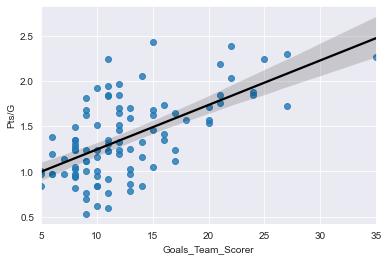

In [195]:
sns.set_style("darkgrid")
sns.regplot(x=data1, y=data2, line_kws={'color': 'black'})


Veiem com hi ha certa relació entre les dos variables. La linia de regressió mostra la tendencia general de les dades. Aquestes s'agrupen majoritariament prop de la linia, encara que hi ha algunes que estan més disperses. 

S'ha demostrat que, efectivament, hi ha una relació de dependencia entre els punts per partit i els gols del màxim golejador de l'equip. Malgrat això, a la gràfica no es veu tant clar, per exemple en una relació entre partits guanyats i punts per partit es veuria molt més clar. En canvi, en aquest cas són moltes més les variables que afecten als punt aconseguits al final d'una temporada , com poden ser la qualitat del mitgcampistes que fan les assistències, l'entrenador, la pressió mediàtica, les lesions, l'estat físic i mental del jugador, etc.

Com a conclussió final, tenir un golejador de primer nivell al teu equip és essencial si vols optar a guanyar una lliga, però no és el més important. Hi han moltes més variables que entren en joc. Als últims anys molts equips de futbol han adoptat estils de joc on es dona més importància a l'entrenador, l'estil de joc i una bona direcció deportiva més que als propis jugadors.

## Exercici 3
### Continua amb el conjunt de dades adjunt i selecciona tres atributs del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%.

Vull saber si els gols esperats per un equip tenen la mateixa distribució que els gols a favor i els punts totals.

Utilitzaré l'algorisme de Friedman Test.

H0: Les tres variables probablement tenen la mateixa distribució

H1: Les tres variables probablement tenen diferent distribució.

In [206]:
from scipy.stats import friedmanchisquare
data1 = df["Pts"]
data2 = df["GF"]
data3 = df["xG"]
stat, p = friedmanchisquare(data1, data2, data3)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probablement la mateixa distribució.')
else:
 print('Probablement diferent distribució.')

stat=149.041, p=0.000
Probablement diferent distribució.


In [207]:
# La p-value és casi 0.

Probablement els gols esperats, els gols a favor i els punts totals tenen la mateixa distribució. Rebutjo la hipòtesi nul·la.

In [209]:
sns.regplot=(df["Pts"], df["GF"], df["xG"])
plt.show()

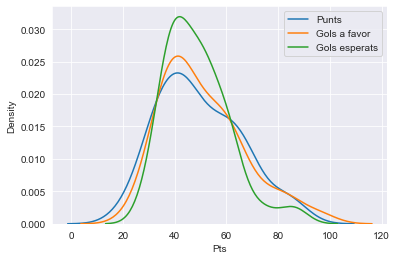

In [214]:
#sns.kdeplot(mostra, fill=True, color="g")
sns.kdeplot(df["Pts"], label="Punts")
sns.kdeplot(df["GF"], label="Gols a favor")
sns.kdeplot(df["xG"], label="Gols esperats")
plt.legend()

A la gràfica es mostra la funció de distribució de cadascuna de les tres variables. Es pot observar com realment tenen una distribució molt semblant. La mitjana i la moda prenen valors similars, la forma de la corva s'asembla molt sobretot ente Punts i Gols a favor i les tres es solapen entre elles.